https://github.com/pankymathur/simple-linear-regression-using-python-only

In [16]:
# 학습 알고리즘의 일종
def step_gradient(bias_current, param_current, points, learningRate, iteration):
    bias_gradient = 0
    param_gradient = 0
    N = float(len(points))
    
    for i in range(len(points)):
        x = points[i,0] # i 번째 행, 0번째 열
        y = points[i,1] # i 번째 행, 1번째 열
        
        bias_gradient += -(2/N)*(y-((param_current*x)+bias_current))
        param_gradient += -(2/N)*x*(y-((param_current*x)+bias_current))
        
    new_bias = bias_current - (learningRate * bias_gradient)
    new_param = param_current - (learningRate * bias_gradient)
    
    return [new_bias, new_param]

In [14]:
def gradient_descent_runner(points, starting_bias, starting_param, learning_rate, num_iterations):
    bias_1 = starting_bias
    param_1 = starting_param
    
    for i in range(num_iterations):
        bias_1, param_1 = step_gradient(bias_1, param_1, array(points), learning_rate, i)
        
        return [bias_1, param_1]

In [11]:
def compute_error_for_line_given_points(bias, param, points):
    totalError = 0
    error = 0
    
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1]
        
        error = ((y-(param*x + bias)) **2)/len(points)
        totalError += error / len(points)
        
        print("At Row {0}, using b = {1} and m = {2}, Error = {3}".format(i, bias, param, error))
        
        print("\n Total Error is: {0}".format(totalError))
        return error, totalError

In [19]:
import pandas as pd
# pandas: 금융 관련 라이브러리
# 여기서는 데이터셋의 모습을 간략하게 살펴보기 위해 사용
dataset = pd.read_csv("diabetes.csv")

In [20]:
dataset 
# 1열: BMI
# 2열: 혈당(blood sugar)

,41.3,346
0,38.0,341
1,36.7,336
2,33.5,332
3,36.1,321
4,30.8,317
5,26.9,311
6,30.0,310
7,31.6,310
8,34.6,310
9,38.2,308


In [51]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
# matplotlib는 plot을 위한 라이브러리

import numpy as np
# 행렬 연산에 특화된 라이브러리

In [49]:
def graph():
    dv = np.loadtxt('diabetes.csv', delimiter=',')
    #print(dv)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    x = dv[:,0]
    y = dv[:,1]
    ax.scatter(x,y)
    plt.title('diabetes')
    plt.xlabel('BMI')
    plt.ylabel('Blood Sugar')
    plt.show()

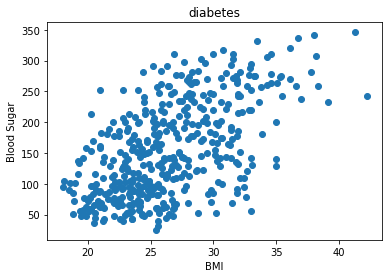

In [50]:
graph()

In [17]:
def pankax():
    # dataset: diabetes(당뇨병).csv
    # 
    points = genfromtxt("diabetes.csv", delimiter=",")
    
    learning_rate = 0.001
    initial_bias = 1
    initial_param = 1
    num_iterations = 100
    
    print("\n First compute Error for each row by using equation y_predicted = param*x + bias and eror = (ground truth - predicted value)^2 / len(points) by using random b = {0}, and p = {1} \n".format(initial_bias, initial_param))
    
    compute_error_for_line_given_points(initial_bias, initial_param, points)
    
    print("\n Now, let's run gradient_descent_runner to get new param and bias with learning rate of {1} and {0} iterations \n".format(num_iterations, learning_rate))
    
    [b,p] = gradient_descent_runner(points, initial_bias, initial_param, learning_rate, num_iterations)
    print(b, p)
    
    compute_error_for_line_given_points(b, p, points)
    print("\n After {0}nd iterations final b = {1}, p = {2} \n".format(num_iterations,b,p))
    print("\n Enter BMI to get blood Sugar \n")
    X_test = 27.2
    print("\n Test/Sample BMI is: {0}\n".format(X_test))
    y_test = p*X_test + b
    print("\n Blood sugar is {0} \n".format(y_test))
    
if __name__ == '__main__':
    pankax()


 First compute Error for each row by using equation y_predicted = param*x + bias and eror = (ground truth - predicted value)^2 / len(points) by using random b = 1, and p = 1 

At Row 0, using b = 1 and m = 1, Error = 208.6735067873303

 Total Error is: 0.47211200630617717

 Now, let's run gradient_descent_runner to get new param and bias with learning rate of 0.001 and 100 iterations 

1.24951538462 1.24951538462
At Row 0, using b = 1.2495153846153841 and m = 1.2495153846153841, Error = 194.42145637840935

 Total Error is: 0.43986754836744196

 After 100nd iterations final b = 1.2495153846153841, p = 1.2495153846153841 


 Enter BMI to get blood Sugar 


 Test/Sample BMI is: 27.2


 Blood sugar is 35.23633384615383 

